# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create URL for API call
url = f"http://api.openweathermap.org/data/2.5/weather?"

#list of city data
city_data = []

#print logger
print("Begginning Data Collection")
print("-" * 15)

#create a counter
record_count = 1
set_count = 1
#loop through all cities
for index, city in enumerate(cities):
    #group Cities into sets of 50 for logging
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    #create endpoint url with each city
    
    city_url =  f"{url}&q={city}&appid={weather_api_key}"
    
    #log the url and record and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # extract out max temp and humidity
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append the data
        
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    except:
        print("City Not Found. Skipping....")
        pass
#indidcate data loading is complete
print("---------------------")
print("Data Loading Complete")
print("---------------------")
print(city_url)


Begginning Data Collection
---------------
Processing Record 1 of Set 1 | taolanaro
City Not Found. Skipping....
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | maarianhamina
Processing Record 6 of Set 1 | tarauaca
Processing Record 7 of Set 1 | sahrak
City Not Found. Skipping....
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | tabiauea
City Not Found. Skipping....
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | cochabamba
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | vaitupu
City Not Found. Skipping....
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | carnarvon
Processing Record 21

Processing Record 38 of Set 4 | mayo
Processing Record 39 of Set 4 | srednekolymsk
Processing Record 40 of Set 4 | borogontsy
Processing Record 41 of Set 4 | mora
Processing Record 42 of Set 4 | priladozhskiy
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | tarakan
Processing Record 46 of Set 4 | fevralsk
City Not Found. Skipping....
Processing Record 47 of Set 4 | rio gallegos
Processing Record 48 of Set 4 | portland
Processing Record 49 of Set 4 | nuuk
Processing Record 0 of Set 5 | palmerston north
Processing Record 1 of Set 5 | asau
Processing Record 2 of Set 5 | sur
Processing Record 3 of Set 5 | keti bandar
Processing Record 4 of Set 5 | margate
Processing Record 5 of Set 5 | tsihombe
City Not Found. Skipping....
Processing Record 6 of Set 5 | nanortalik
Processing Record 7 of Set 5 | athni
Processing Record 8 of Set 5 | aprelevka
Processing Record 9 of Set 5 | selikhino
Processing Record 10 of Set 5 | aasiaat
Processing R

Processing Record 29 of Set 8 | berdigestyakh
Processing Record 30 of Set 8 | ramnagar
Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | tarancon
Processing Record 33 of Set 8 | porto nacional
Processing Record 34 of Set 8 | meulaboh
Processing Record 35 of Set 8 | beian
Processing Record 36 of Set 8 | anadyr
Processing Record 37 of Set 8 | zheleznodorozhnyy
Processing Record 38 of Set 8 | pacifica
Processing Record 39 of Set 8 | vardo
Processing Record 40 of Set 8 | blackwater
Processing Record 41 of Set 8 | empalme
Processing Record 42 of Set 8 | sao joao da barra
Processing Record 43 of Set 8 | ankpa
Processing Record 44 of Set 8 | mbandaka
Processing Record 45 of Set 8 | evensk
Processing Record 46 of Set 8 | sao gabriel da cachoeira
Processing Record 47 of Set 8 | polunochnoye
Processing Record 48 of Set 8 | vynohradove
Processing Record 49 of Set 8 | ahuimanu
Processing Record 0 of Set 9 | zmiyiv
Processing Record 1 of Set 9 | mtsamboro
Processing Reco

Processing Record 16 of Set 12 | abu dhabi
Processing Record 17 of Set 12 | sao sebastiao
Processing Record 18 of Set 12 | monteagudo
Processing Record 19 of Set 12 | challapalle
Processing Record 20 of Set 12 | labytnangi
Processing Record 21 of Set 12 | monywa
Processing Record 22 of Set 12 | toamasina
Processing Record 23 of Set 12 | tena
Processing Record 24 of Set 12 | simao
Processing Record 25 of Set 12 | tazovskiy
Processing Record 26 of Set 12 | gamba
Processing Record 27 of Set 12 | sambava
Processing Record 28 of Set 12 | anori
Processing Record 29 of Set 12 | sisimiut
Processing Record 30 of Set 12 | guarapari
Processing Record 31 of Set 12 | vagur
Processing Record 32 of Set 12 | samalaeulu
City Not Found. Skipping....
Processing Record 33 of Set 12 | kamenka
Processing Record 34 of Set 12 | bongandanga
Processing Record 35 of Set 12 | callaguip
Processing Record 36 of Set 12 | safford
Processing Record 37 of Set 12 | majene
Processing Record 38 of Set 12 | kodinsk
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#convert Json to Panda
city_data_df = pd.DataFrame(city_data)

#extract fields from Data Frame
latitude = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloud_conditions = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [7]:
#display
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,291.31,88,20,5.14,ZA,1628156890
1,ancud,-41.8697,-73.8203,283.89,81,100,9.75,CL,1628157038
2,ushuaia,-54.8000,-68.3000,281.96,66,20,2.06,AR,1628157038
3,maarianhamina,60.0973,19.9348,292.07,68,0,5.66,AX,1628157038
4,tarauaca,-8.1614,-70.7656,291.68,62,7,1.13,BR,1628157039


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
#There are no cities with over 100 percent humidity. This step is pointless.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

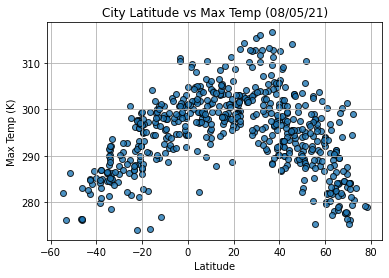

In [8]:
#build scatter plot for lat vs temp
plt.scatter(latitude,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Add everything else the graph needs
plt.title(f"City Latitude vs Max Temp (%s)" %time.strftime("%x"))
plt.ylabel("Max Temp (K)")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("output_data/Fig1.png")

plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

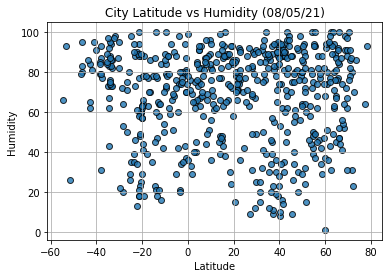

In [9]:
#build scatter plot for lat vs Humidity
plt.scatter(latitude,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Add everything else the graph needs
plt.title(f"City Latitude vs Humidity (%s)" %time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("output_data/Fig2.png")

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

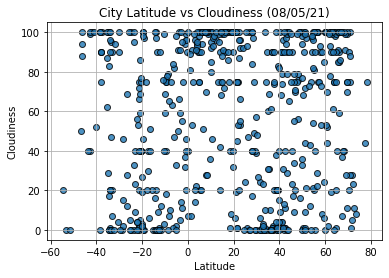

In [10]:
#build scatter plot for lat vs Cloudiness
plt.scatter(latitude,
           cloud_conditions,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Add everything else the graph needs
plt.title(f"City Latitude vs Cloudiness (%s)" %time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("output_data/Fig3.png")

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

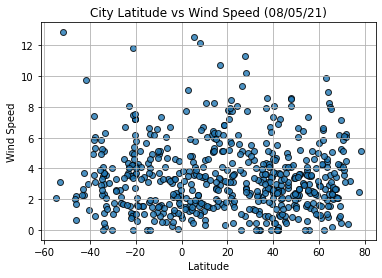

In [11]:
#build scatter plot for lat vs WindSpeed
plt.scatter(latitude,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Add everything else the graph needs
plt.title(f"City Latitude vs Wind Speed (%s)" %time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("output_data/Fig4.png")

plt.show

## Linear Regression

In [22]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="blue")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is : {rvalue}")
    plt.show()

In [23]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.6082315844385302


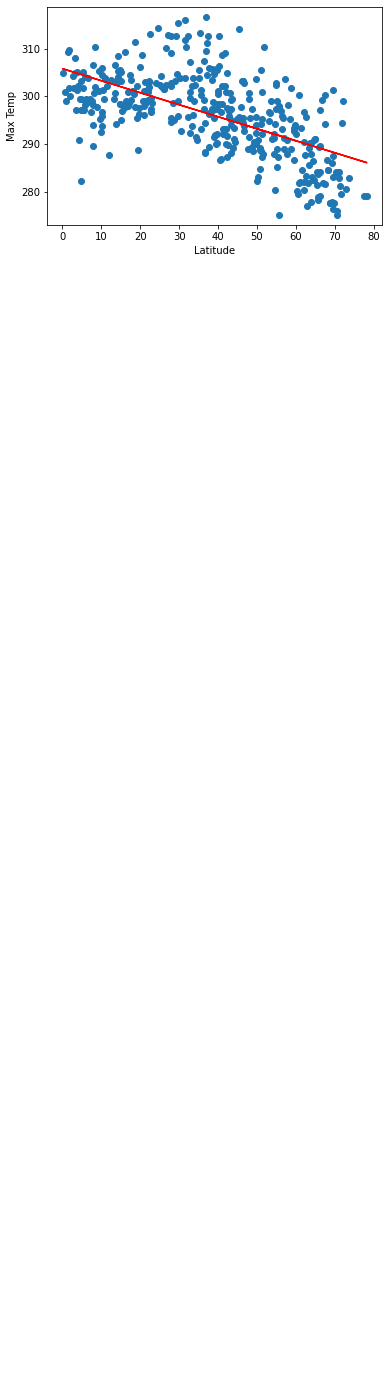

In [24]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.7190508499994199


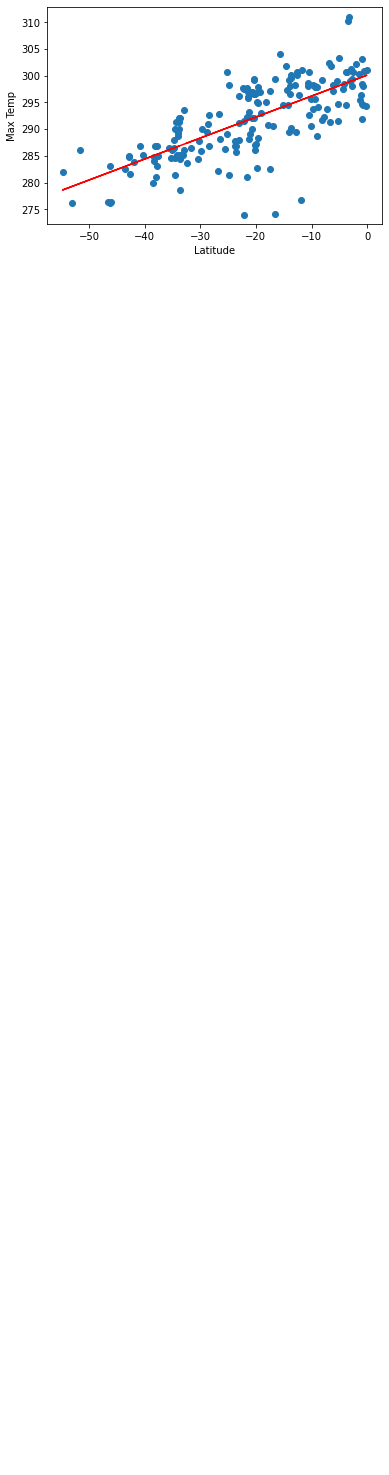

In [25]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.006492960953649443


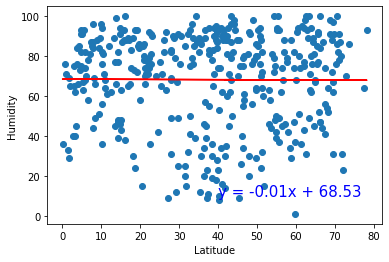

In [26]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.15801528914365173


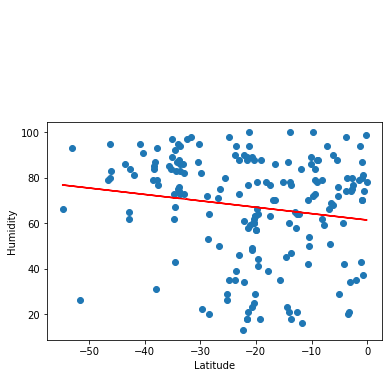

In [28]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.10200789173774072


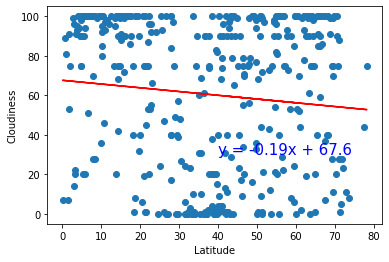

In [31]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.027021301614178598


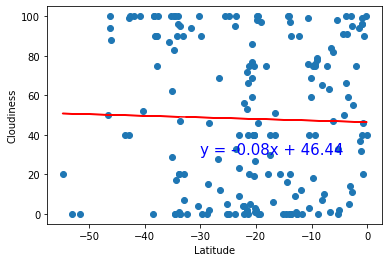

In [32]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.07400930366675008


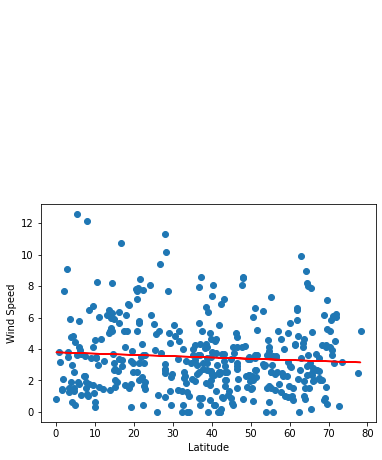

In [33]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.13134645654397054


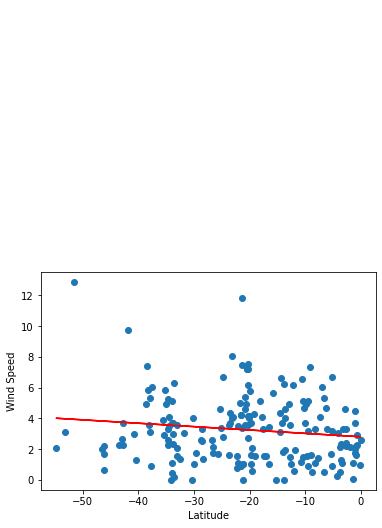

In [34]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))